In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from math import *
from matplotlib.colors import Normalize
import random

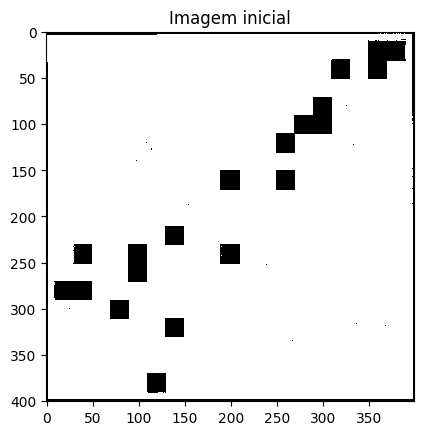

In [2]:
pgmf = open('my_map.pgm', 'rb')
image = plt.imread(pgmf)

image_copia = 1.0 * (image > 250)

goal = (80, 325) 
robo = (300, 25) 

image_copia[goal[0]][goal[1]] = 0 
image_copia[robo[0]][robo[1]] = 0   

fig = plt.figure()
fig.canvas.manager.set_window_title('Figura 1')

plt.imshow(image_copia, interpolation='nearest', cmap='gray')
plt.title('Imagem inicial')
plt.show()

In [3]:
#teste de como gerar um numero aleatório

numero_rand = random.randint(10, 350)
print(numero_rand)

289


CHEGOOOOOU


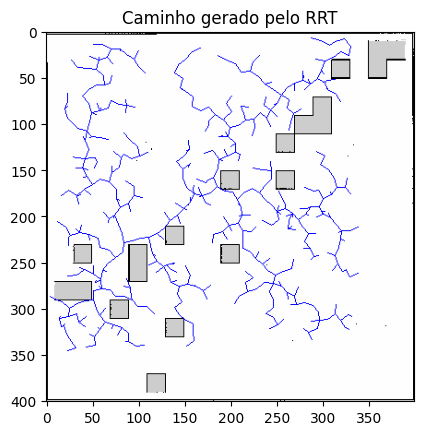

In [4]:
#tentativa n sei qual
f_crescimento = 10
arvore = [robo] 
caminho = []
pais =list()
filhos = list()
max_interacoes = 1000

def achando_no_proximo(arvore, ponto_aleatorio):
    menor_dist = math.dist((350,0), (0,350))
    no_mais_prox = 0
    for n in arvore:
        dist = math.dist(n, ponto_aleatorio)
        if dist < menor_dist:
            menor_dist = dist
            no_mais_prox = n
    return no_mais_prox

def gerando_novo_no(no_mais_prox, ponto_aleatorio, f_crescimento):
    vet_direcao = (ponto_aleatorio[0] - no_mais_prox[0], ponto_aleatorio[1] - no_mais_prox[1])
    modulo_vet = math.sqrt(vet_direcao[0]**2 + vet_direcao[1]**2)

    if modulo_vet < f_crescimento:
        return ponto_aleatorio
    
    fator = f_crescimento / modulo_vet
    novo_no = (int(no_mais_prox[0] + vet_direcao[0] * fator), int(no_mais_prox[1] + vet_direcao[1] * fator))
    
    return novo_no

for i in range(max_interacoes):
    ponto_aleatorio = (random.randint(0, 350), random.randint(0, 350))  

    no_mais_proximo = achando_no_proximo(arvore, ponto_aleatorio)
    novo_no = gerando_novo_no(no_mais_proximo, ponto_aleatorio, f_crescimento)

    if image_copia[novo_no[0]][novo_no[1]] == 1.0: 
        arvore.append(novo_no)  
        caminho.append((no_mais_proximo, novo_no)) 
        pais.append(no_mais_proximo)
        filhos.append(novo_no)

        if math.dist(novo_no, goal) < f_crescimento:
            print("CHEGOOOOOU")
            break


#Mapa em escala de cinza
image_copia = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)

#Função pra colorir as linhas entre um no e outro da arvore
for (ponto1, ponto2) in caminho:
    cv2.line(image_copia, ponto1[::-1], ponto2[::-1], (0, 0, 255), 1) #esse ponto[::-1] serve pra trocar x e y do lugar pq no openCV é ao contrario

plt.imshow(image_copia)
plt.title('Caminho gerado pelo RRT')
plt.show()


(68, 314)
420
(64, 306)
(64, 306)
251
(56, 302)
(56, 302)
165
(51, 294)
(51, 294)
161
(57, 286)
(57, 286)
152
(53, 278)
(53, 278)
126
(56, 269)
(56, 269)
120
(61, 261)
(61, 261)
110
(69, 255)
(69, 255)
102
(78, 250)
(78, 250)
84
(85, 243)
(85, 243)
82
(94, 239)
(94, 239)
81
(88, 232)
(88, 232)
80
(95, 225)
(95, 225)
78
(96, 216)
(96, 216)
75
(102, 208)
(102, 208)
68
(104, 199)
(104, 199)
67
(114, 197)
(114, 197)
66
(121, 205)
(121, 205)
59
(131, 205)
(131, 205)
50
(135, 196)
(135, 196)
48
(139, 187)
(139, 187)
47
(149, 186)
(149, 186)
45
(158, 181)
(158, 181)
44
(168, 185)
(168, 185)
40
(175, 178)
(175, 178)
39
(178, 169)
(178, 169)
36
(176, 160)
(176, 160)
33
(185, 156)
(185, 156)
32
(192, 149)
(192, 149)
31
(199, 142)
(199, 142)
30
(205, 134)
(205, 134)
28
(213, 128)
(213, 128)
25
(219, 120)
(219, 120)
22
(223, 111)
(223, 111)
20
(224, 102)
(224, 102)
17
(227, 93)
(227, 93)
16
(229, 84)
(229, 84)
13
(239, 83)
(239, 83)
12
(245, 75)
(245, 75)
10
(251, 67)
(251, 67)
8
(259, 61)
(259, 6

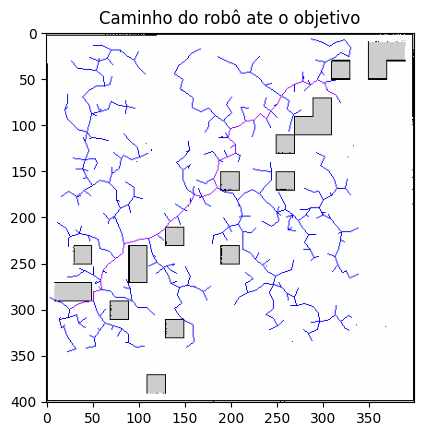

In [9]:
caminho_correto = []
filho = no_mais_proximo
pai = novo_no

while(1):
    print(filho)
    ind = filhos.index(filho)
    print(ind)
    pai = pais[ind]
    print(pai)
    caminho_correto.append((pai, filho))
    filho = pai
    if(filho == robo):
        break


#Função pra colorir as linhas entre um no e outro da arvore
for (ponto1, ponto2) in caminho_correto:
    cv2.line(image_copia, ponto1[::-1], ponto2[::-1], (150, 0, 255), 1) #esse ponto[::-1] serve pra trocar x e y do lugar pq no openCV é ao contrario

plt.imshow(image_copia)
plt.title('Caminho do robô ate o objetivo')
plt.show()

In [6]:
print(pais)
print(filhos)

[(300, 25), (295, 33), (292, 42), (291, 51), (281, 51), (279, 60), (279, 60), (269, 59), (259, 61), (269, 59), (251, 67), (245, 75), (245, 75), (239, 83), (229, 84), (291, 51), (229, 84), (227, 93), (219, 82), (209, 78), (224, 102), (199, 74), (223, 111), (280, 69), (191, 80), (219, 120), (287, 75), (181, 76), (213, 128), (223, 111), (205, 134), (199, 142), (192, 149), (185, 156), (171, 76), (163, 68), (176, 160), (163, 68), (160, 58), (178, 169), (175, 178), (300, 54), (168, 185), (173, 193), (168, 185), (158, 181), (176, 160), (149, 186), (139, 187), (237, 68), (135, 196), (174, 202), (166, 50), (169, 152), (153, 71), (182, 207), (175, 214), (182, 207), (170, 223), (131, 205), (175, 231), (175, 231), (190, 211), (232, 113), (199, 74), (241, 115), (121, 205), (114, 197), (104, 199), (167, 237), (199, 212), (182, 237), (208, 208), (157, 44), (158, 181), (102, 208), (191, 80), (300, 25), (96, 216), (148, 39), (95, 225), (88, 232), (94, 239), (308, 58), (85, 243), (309, 24), (199, 212), 

In [7]:
teste = math.dist((120,140),(100,100))
teste2 = math.dist((100,100),(104,109))
print(teste, teste2)

44.721359549995796 9.848857801796104


In [8]:
print(caminho)

[((300, 25), (295, 33)), ((295, 33), (292, 42)), ((292, 42), (291, 51)), ((291, 51), (281, 51)), ((281, 51), (279, 60)), ((279, 60), (269, 59)), ((279, 60), (280, 69)), ((269, 59), (259, 61)), ((259, 61), (251, 67)), ((269, 59), (263, 51)), ((251, 67), (245, 75)), ((245, 75), (237, 68)), ((245, 75), (239, 83)), ((239, 83), (229, 84)), ((229, 84), (219, 82)), ((291, 51), (300, 54)), ((229, 84), (227, 93)), ((227, 93), (224, 102)), ((219, 82), (209, 78)), ((209, 78), (199, 74)), ((224, 102), (223, 111)), ((199, 74), (191, 80)), ((223, 111), (219, 120)), ((280, 69), (287, 75)), ((191, 80), (181, 76)), ((219, 120), (213, 128)), ((287, 75), (287, 84)), ((181, 76), (171, 76)), ((213, 128), (205, 134)), ((223, 111), (232, 113)), ((205, 134), (199, 142)), ((199, 142), (192, 149)), ((192, 149), (185, 156)), ((185, 156), (176, 160)), ((171, 76), (163, 68)), ((163, 68), (160, 58)), ((176, 160), (178, 169)), ((163, 68), (153, 71)), ((160, 58), (166, 50)), ((178, 169), (175, 178)), ((175, 178), (16